In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import random
#import cv2
import os

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Changing directory to images
os.chdir("/content/drive/MyDrive/")

In [ ]:
# Check Classes 
image_names=list(os.listdir("Database/"))
image_names.sort()
print(image_names)
class_number = len(image_names)

['COVID19', 'NORMAL', 'Viral_Pneumonia']


In [ ]:
device = tf.test.gpu_device_name()
device

'/device:GPU:0'

In [ ]:
# MODEL 

data_dir = "Database/"
batch_size = 128
img_height, img_width = 224,224
epochs = 100

In [ ]:
# MODEL TRAINING

datagen= ImageDataGenerator(rescale=1/255,validation_split=.3,rotation_range=20,
                           shear_range=.2,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2)

# Flow training images in batches of batch_size using train_data 
train_generator= datagen.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                subset="training",
                class_mode="categorical", 
                classes= image_names,
                shuffle=True, 
                seed=30)


datagen2=ImageDataGenerator(rescale=1/255,validation_split=.3)

val_generator=datagen2.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                classes= image_names,
                class_mode="categorical", 
                subset="validation", 
                shuffle=True, 
                seed=30)

## For evaluation
eval_train_generator= datagen.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                subset="training",
                class_mode="categorical", 
                classes= image_names,
                shuffle=False, 
                seed=30)

eval_val_generator=datagen2.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                classes= image_names,
                class_mode="categorical", 
                subset="validation", 
                shuffle=False, 
                seed=30)

Found 2919 images belonging to 3 classes.
Found 1250 images belonging to 3 classes.
Found 2919 images belonging to 3 classes.
Found 1250 images belonging to 3 classes.


In [ ]:
with tf.device(device):

  restnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

  x=Flatten()(restnet_model.output)
  x=Dense(3, activation="softmax")(x)
  model=Model(inputs=restnet_model.input,outputs=x)


  for layer in restnet_model.layers:
      layer.trainable=False
      
  model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

  history= model.fit(train_generator,epochs=100, validation_data=val_generator)



Epoch 1/100
23/23 [==============================] - 87s 4s/step - loss: 4.0363 - accuracy: 0.3318 - val_loss: 0.7942 - val_accuracy: 0.6344
Epoch 2/100
23/23 [==============================] - 82s 4s/step - loss: 1.1265 - accuracy: 0.4816 - val_loss: 0.7841 - val_accuracy: 0.6680
Epoch 3/100
23/23 [==============================] - 82s 4s/step - loss: 0.7592 - accuracy: 0.6780 - val_loss: 0.7396 - val_accuracy: 0.5976
Epoch 4/100
23/23 [==============================] - 82s 4s/step - loss: 0.7009 - accuracy: 0.6849 - val_loss: 0.5519 - val_accuracy: 0.7656
Epoch 5/100
23/23 [==============================] - 82s 4s/step - loss: 0.6378 - accuracy: 0.7402 - val_loss: 0.5052 - val_accuracy: 0.8232
Epoch 6/100
23/23 [==============================] - 82s 4s/step - loss: 0.5884 - accuracy: 0.7686 - val_loss: 0.4743 - val_accuracy: 0.8416
Epoch 7/100
23/23 [==============================] - 82s 4s/step - loss: 0.5819 - accuracy: 0.7673 - val_loss: 0.5655 - val_accuracy: 0.7392
Epoch 8/100
2

In [ ]:
# Train loss/ Train Accuracy
train_loss, train_acc = model.evaluate(train_generator)
print("\n Train Accuracy:", train_acc)
print("\n Train Loss:", train_loss)

23/23 [==============================] - 64s 3s/step - loss: 0.2886 - accuracy: 0.8921

 Train Accuracy: 0.8920863270759583

 Train Loss: 0.2885723114013672


In [ ]:
# Test Loss/ Test Accuracy
test_loss, test_acc= model.evaluate(val_generator)
print("\n Test Accuracy:", test_acc)
print("\n Test Loss:", test_loss)

10/10 [==============================] - 17s 2s/step - loss: 0.3086 - accuracy: 0.8888

 Test Accuracy: 0.8888000249862671

 Test Loss: 0.3086176812648773


INFO:tensorflow:Assets written to: resnet_model/assets


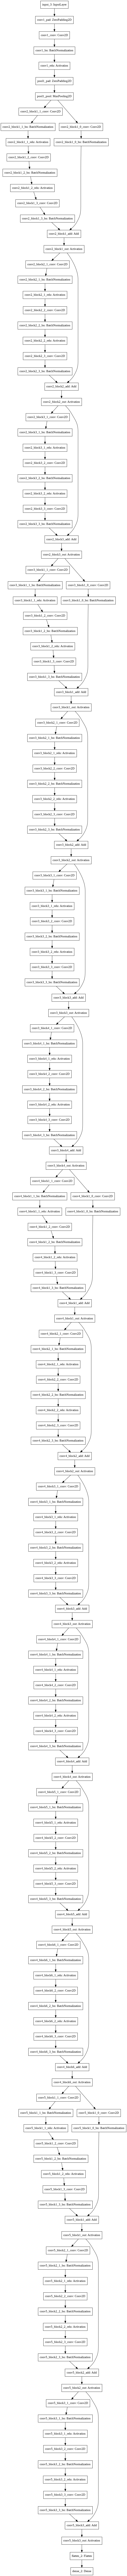

In [ ]:
# Save Model 
model.save('resnet_model')
model.save('resnet_model/resnet_model.h5')

resnet_model_history_df = pd.DataFrame(history.history) 
resnet_model_history_df.to_csv('resnet_model/history.csv')

tf.keras.utils.plot_model(
    model, to_file='resnet_model/architecture.png', show_shapes=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)